In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
from joblib import delayed, Parallel

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#load the datasets 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#display their shape
print("Shape of training data - ", train.shape)
print("Shape of testing data - ",  test.shape)

Shape of training data -  (2190, 13)
Shape of testing data -  (730, 12)


In [4]:
#display sample data

print("\nSample of Training data")#training data
display(train.sample(5))

print("\nSample of Testing data")
display(test.sample(5))


Sample of Training data


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
2092  2092  268    1013.7     29.2         25.3     23.1      20.7      77.0   
1730  1730  271    1011.5     26.2         23.9     22.9      22.8      93.0   
1971  1971  147    1009.1     28.2         26.3     25.6      23.0      80.0   
955    955  226    1008.1     29.6         26.9     24.8      25.8      78.0   
1300  1300  206    1000.0     31.4         28.0     26.9      24.7      79.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
2092   19.0       9.5           20.0       10.3         0  
1730   84.0       1.6           80.0       41.3         1  
1971   83.0       1.4          230.0        5.9         1  
955    88.0       6.9           60.0       17.3         1  
1300   84.0       2.9          220.0       23.9         1


Sample of Testing data


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
185  2375  186    1008.1     31.0         28.8     26.7      24.6      81.0   
565  2755  201    1011.4     35.7         31.1     27.7      24.8      75.0   
713  2903  349    1019.7     22.3         20.5     19.7      18.2      74.0   
562  2752  198    1005.3     34.4         30.4     27.0      24.9      74.0   
548  2738  184    1008.1     32.3         29.7     27.2      26.4      81.0   

     cloud  sunshine  winddirection  windspeed  
185   57.0       6.8          220.0        9.8  
565   66.0       6.9           10.0       19.8  
713   71.0       6.8           30.0       26.8  
562   48.0      10.0           10.0       13.7  
548   88.0       8.8          220.0       16.5

In [5]:
# Display information about the DataFrames
print("\nTrain Data Info:")
train.info()

print("\nTest Data Info:")
test.info()



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtyp

In [6]:
# Display NULL Clunts
print("Train NULL Counts", train.isnull().sum().sum())
print("Test NULL Counts", test.isnull().sum().sum())

Train NULL Counts 0
Test NULL Counts 1


In [7]:
# Display Statistical Information 

print("\nTrain Data Information: ")
train.describe(include='all').T



Train Data Information: 


count         mean         std    min       25%      50%  \
id             2190.0  1094.500000  632.342866    0.0   547.250  1094.50   
day            2190.0   179.948402  105.203592    1.0    89.000   178.50   
pressure       2190.0  1013.602146    5.655366  999.0  1008.600  1013.00   
maxtemp        2190.0    26.365799    5.654330   10.4    21.300    27.80   
temparature    2190.0    23.953059    5.222410    7.4    19.300    25.50   
mintemp        2190.0    22.170091    5.059120    4.0    17.700    23.85   
dewpoint       2190.0    20.454566    5.288406   -0.3    16.800    22.15   
humidity       2190.0    82.036530    7.800654   39.0    77.000    82.00   
cloud          2190.0    75.721918   18.026498    2.0    69.000    83.00   
sunshine       2190.0     3.744429    3.626327    0.0     0.400     2.40   
winddirection  2190.0   104.863151   80.002416   10.0    40.000    70.00   
windspeed      2190.0    21.804703    9.898659    4.4    14.125    20.50   
rainfall       2190.0     0.753425    0.431116    0.0     1.000     1.00   

                    75%     max  
id             1641.750  2189.0  
day             270.000   365.0  
pressure       1017.775  1034.6  
maxtemp          31.200    36.0  
temparature      28.400    31.5  
mintemp          26.400    29.8  
dewpoint         25.000    26.7  
humidity         88.000    98.0  
cloud            88.000   100.0  
sunshine          6.800    12.1  
winddirection   200.000   300.0  
windspeed        27.900    59.5  
rainfall          1.000     1.0

In [8]:

print("\nTest Data Information: ")
test.describe().T


Test Data Information: 


count         mean         std     min       25%      50%  \
id             730.0  2554.500000  210.877136  2190.0  2372.250  2554.50   
day            730.0   183.000000  105.438271     1.0    92.000   183.00   
pressure       730.0  1013.503014    5.505871  1000.0  1008.725  1012.70   
maxtemp        730.0    26.372466    5.672521     7.4    21.600    27.80   
temparature    730.0    23.963288    5.278098     5.9    19.825    25.65   
mintemp        730.0    22.110274    5.170744     4.2    17.825    23.90   
dewpoint       730.0    20.460137    5.391169    -0.0    16.800    22.30   
humidity       730.0    82.669863    7.818714    39.0    77.250    82.00   
cloud          730.0    76.360274   17.934121     0.0    69.000    83.00   
sunshine       730.0     3.664384    3.639272     0.0     0.325     2.20   
winddirection  729.0   103.923182   81.695458    10.0    40.000    70.00   
windspeed      730.0    22.484247    9.954779     4.5    14.500    21.30   

                    75%     max  
id             2736.750  2919.0  
day             274.000   365.0  
pressure       1017.600  1032.2  
maxtemp          31.000    35.8  
temparature      28.375    31.8  
mintemp          26.400    29.1  
dewpoint         25.000    26.7  
humidity         89.000    98.0  
cloud            88.000   100.0  
sunshine          6.675    11.8  
winddirection   200.000   300.0  
windspeed        28.400    59.5

In [9]:
numerical_variables = ['winddirection', 'pressure', 'maxtemp', 'temparature',
                       'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed']

target_variable = 'rainfall' 
categorical_variables = []

#fill the value with median
median_winddirection = test['winddirection'].median()
test['winddirection'].fillna(median_winddirection, inplace=True)

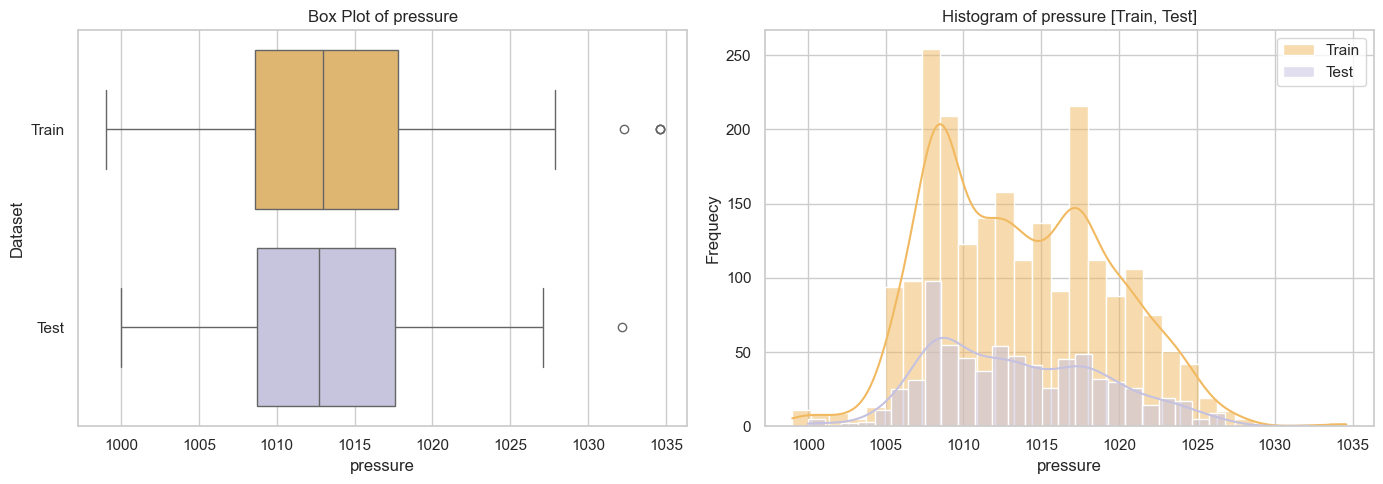

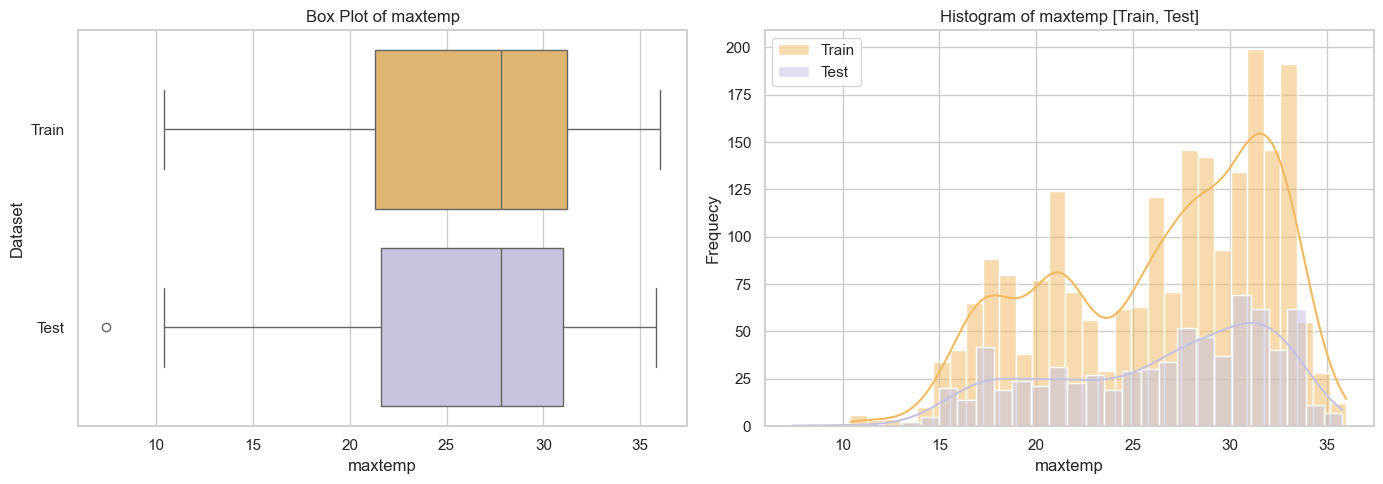

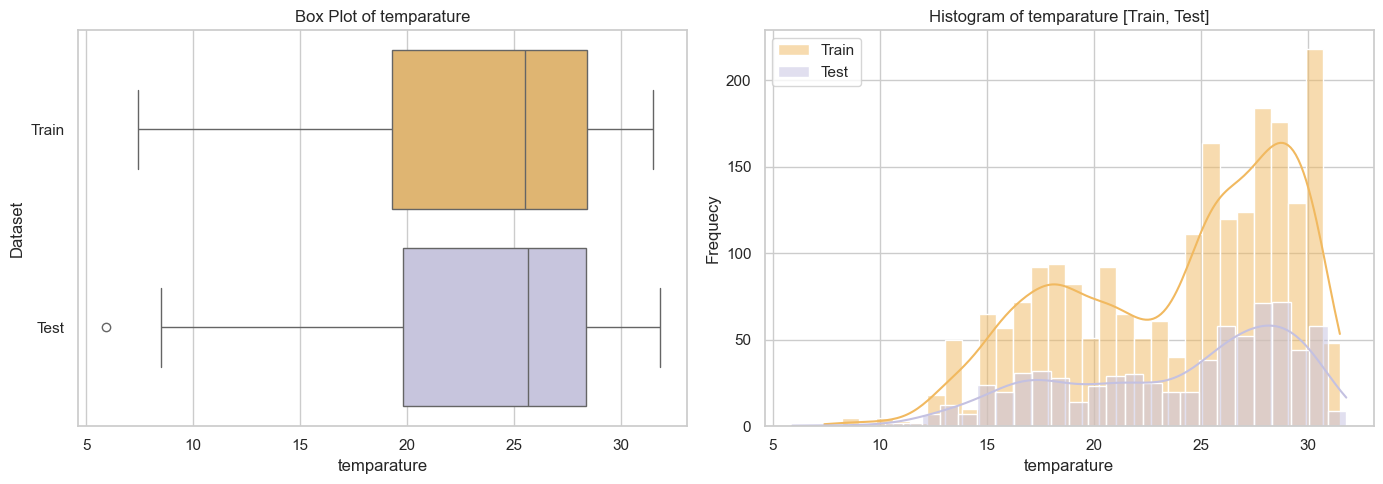

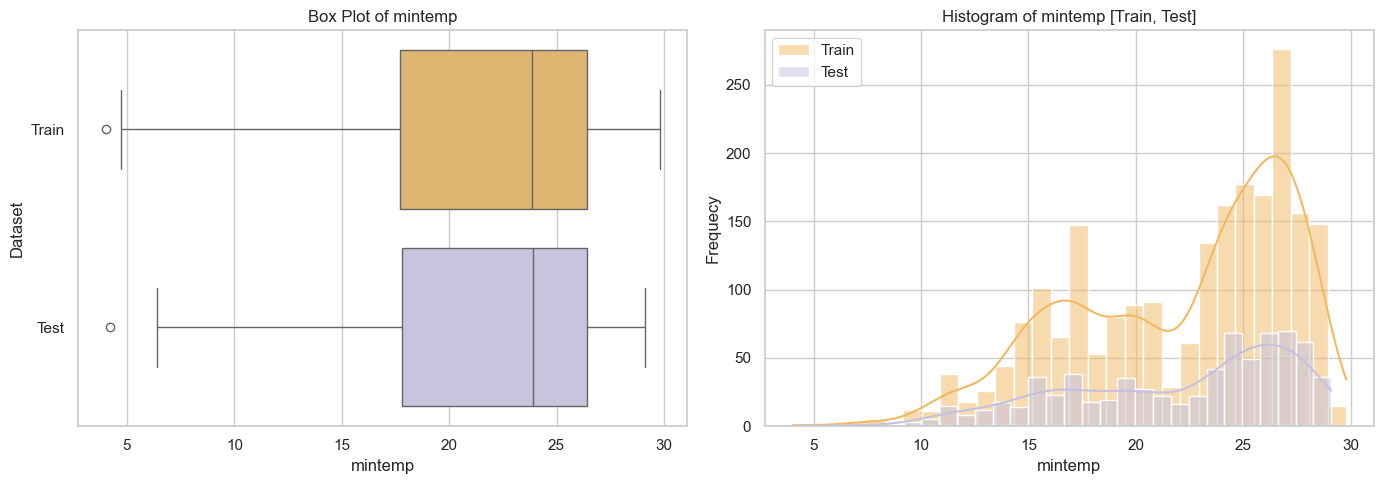

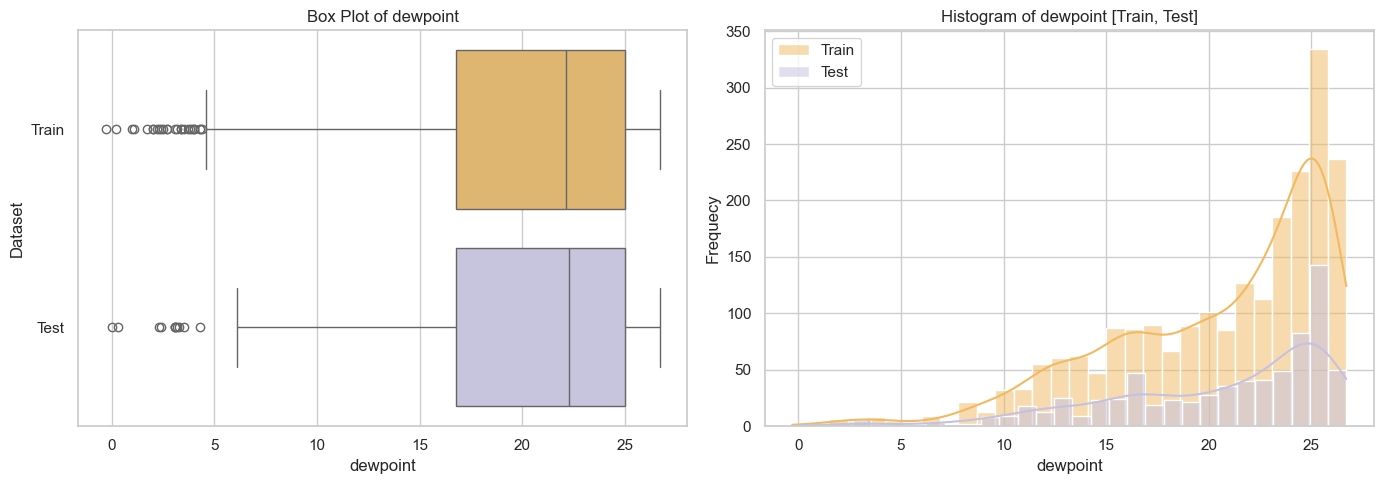

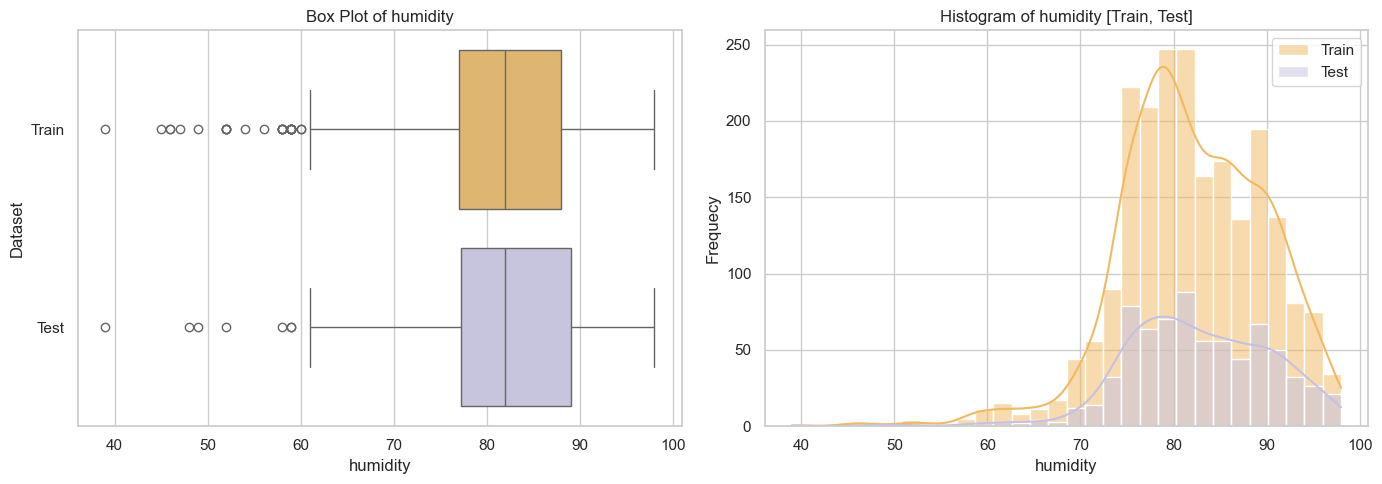

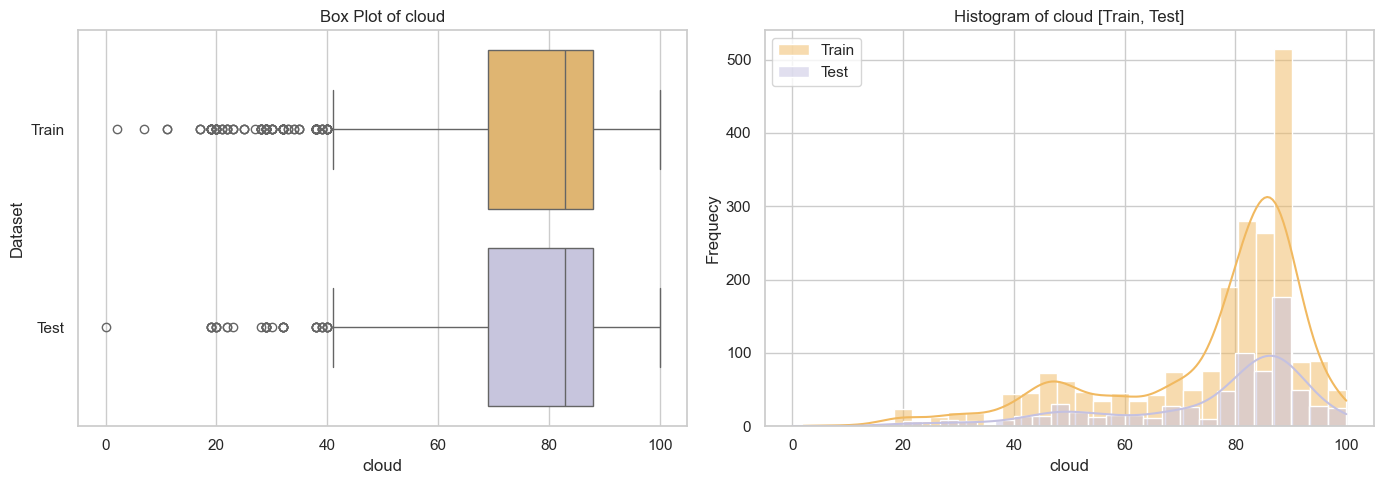

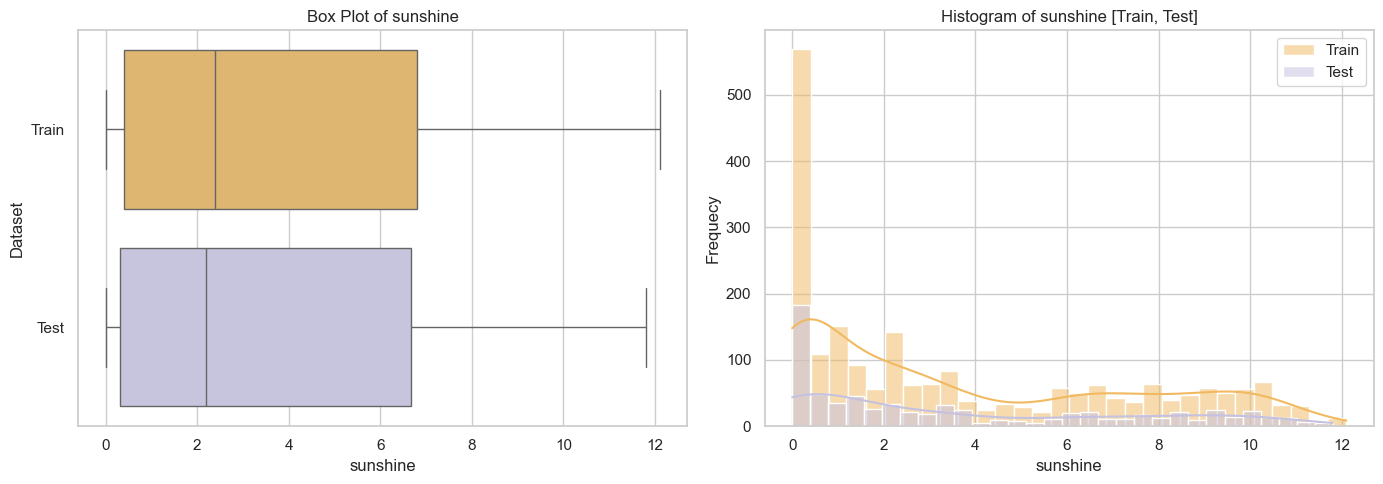

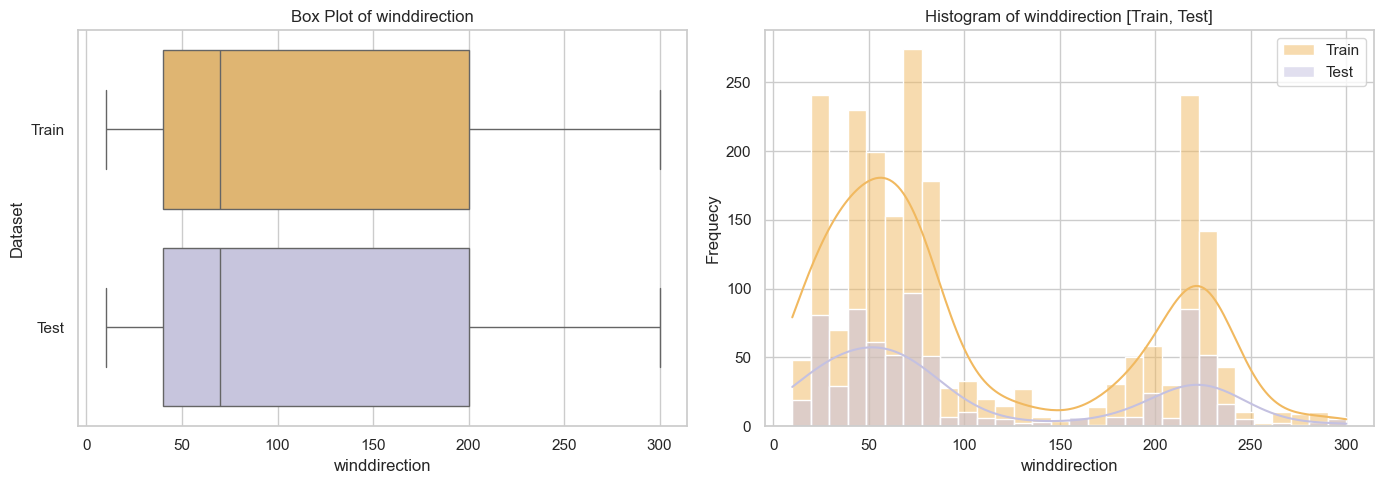

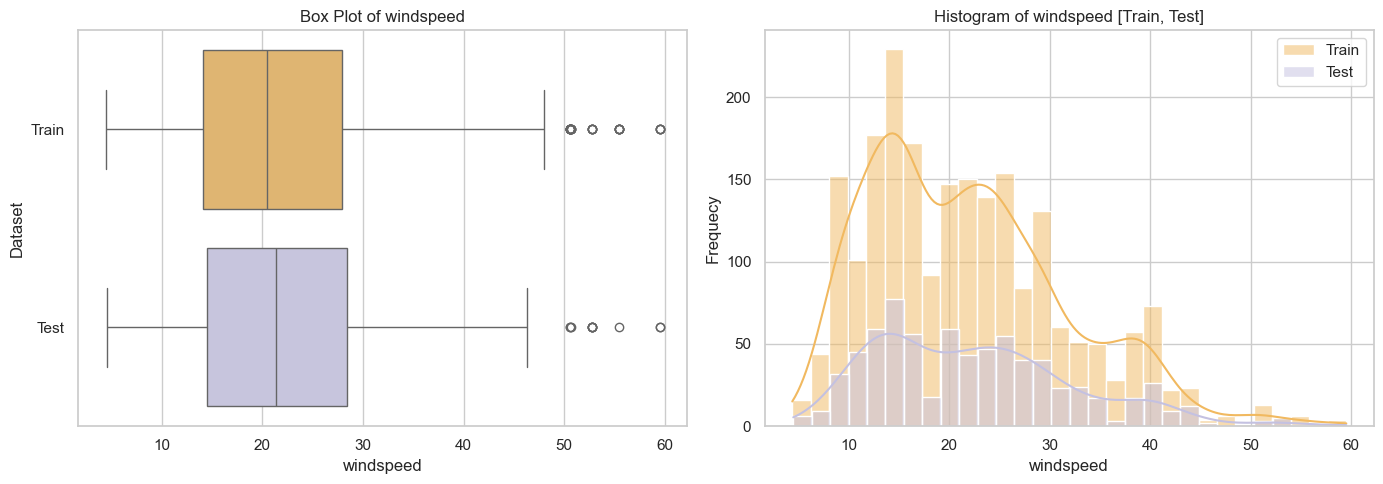

In [10]:
custom_pallete = ['#f1b960', '#c4c1e1']

variables = [col for col in train.columns if col in numerical_variables]

def create_plots(variable):
    sns.set_theme(style='whitegrid')

    train_temp = train.copy()
    test_temp = test.copy()
    # train_temp['Dataset'] = "Train"
    # test_temp['Dataset'] = "Test"
    train_temp = train_temp.assign(Dataset= "Train")
    test_temp = test_temp.assign(Dataset= "Test")
    combined_data = pd.concat([train_temp, test_temp])

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(data=combined_data, x=variable, y="Dataset", palette=custom_pallete, ax=axes[0])
    axes[0].set_xlabel(variable)
    axes[0].set_title(f"Box Plot of {variable}")

    #Histogram
    sns.histplot(data=train, x=variable, color=custom_pallete[0], kde=True,
                 bins=30, label="Train", ax=axes[1])
    sns.histplot(data=test, x=variable, color=custom_pallete[1], kde=True,
                 bins=30, label="Test", ax=axes[1])
    axes[1].set_xlabel(variable)
    axes[1].set_ylabel("Frequecy")
    axes[1].set_title(f"Histogram of {variable} [Train, Test]")
    axes[1].legend()

    plt.tight_layout()
    plt.show()


for variable in variables:
    create_plots(variable)

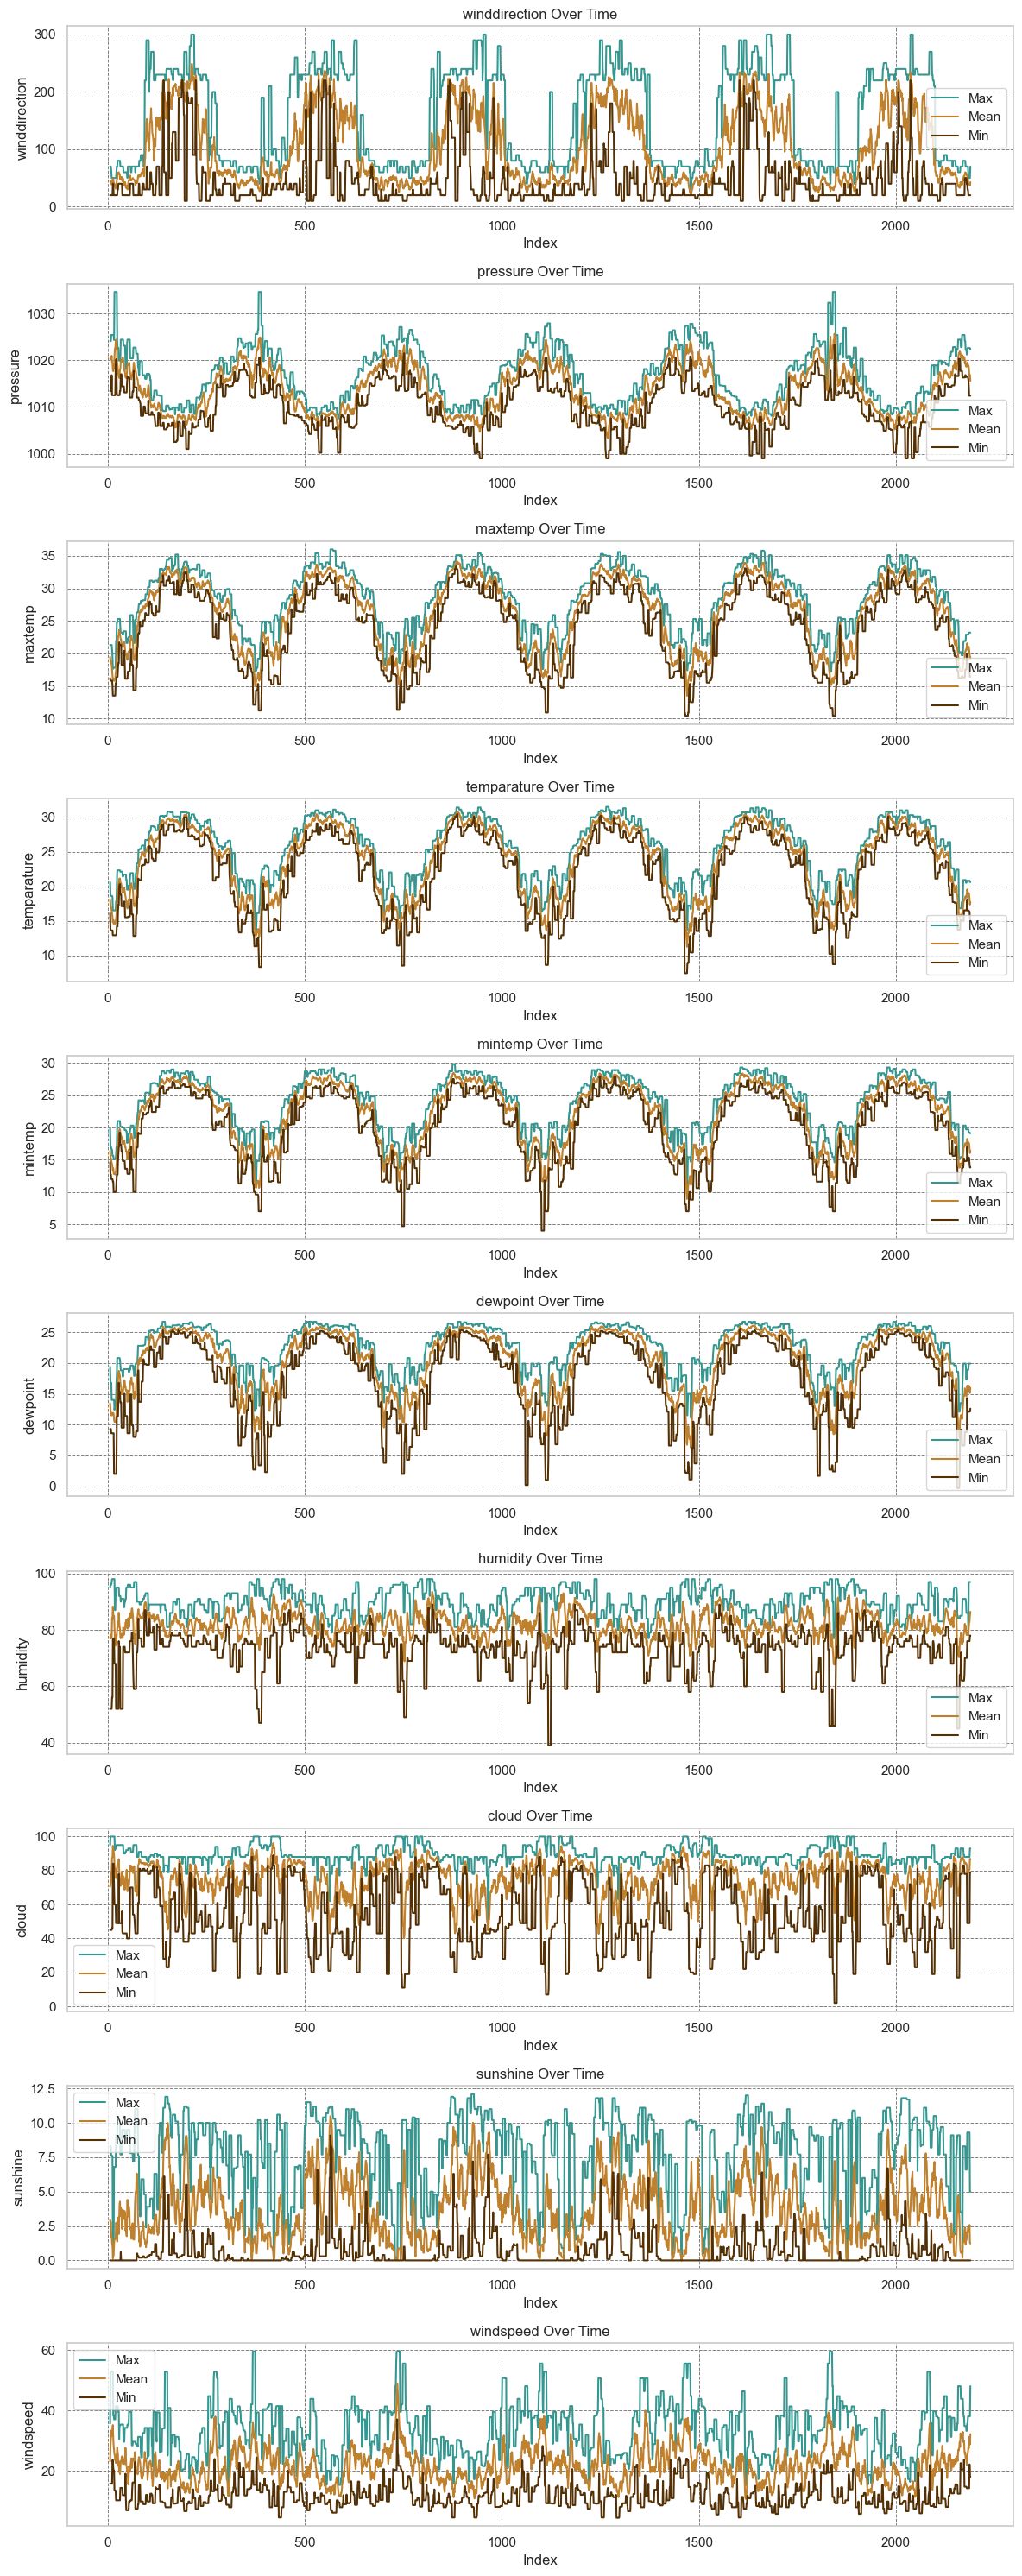

In [11]:
cmap = plt.get_cmap('BrBG')
colors = [cmap(0.8), cmap(0.2), cmap(0)]

fig, axes = plt.subplots(len(numerical_variables), 1, 
                         figsize=(12, len(numerical_variables)*3))

for i, feature in enumerate(numerical_variables):
    rolling_min = train[feature].rolling(window=7).min()
    rolling_max = train[feature].rolling(window=7).max()
    rolling_mean = train[feature].rolling(window=7).mean()

    axes[i].plot(rolling_max, label="Max", color=colors[0])
    axes[i].plot(rolling_mean, label="Mean", color=colors[1])
    axes[i].plot(rolling_min, label="Min", color=colors[2])

    axes[i].set_title(f'{feature} Over Time')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(feature)
    axes[i].grid(color='gray', linestyle='--', linewidth=.7)
    axes[i].legend()

plt.tight_layout()
plt.show()

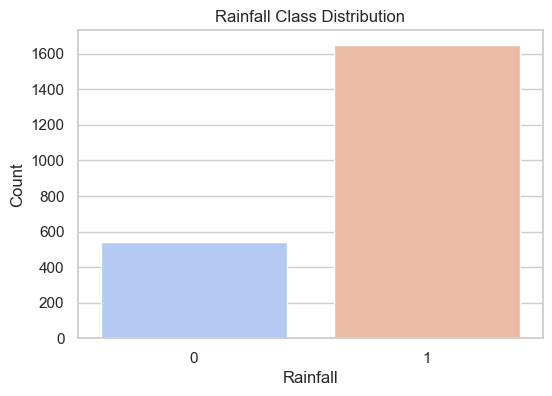

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x=train['rainfall'], palette='coolwarm')
plt.title('Rainfall Class Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()

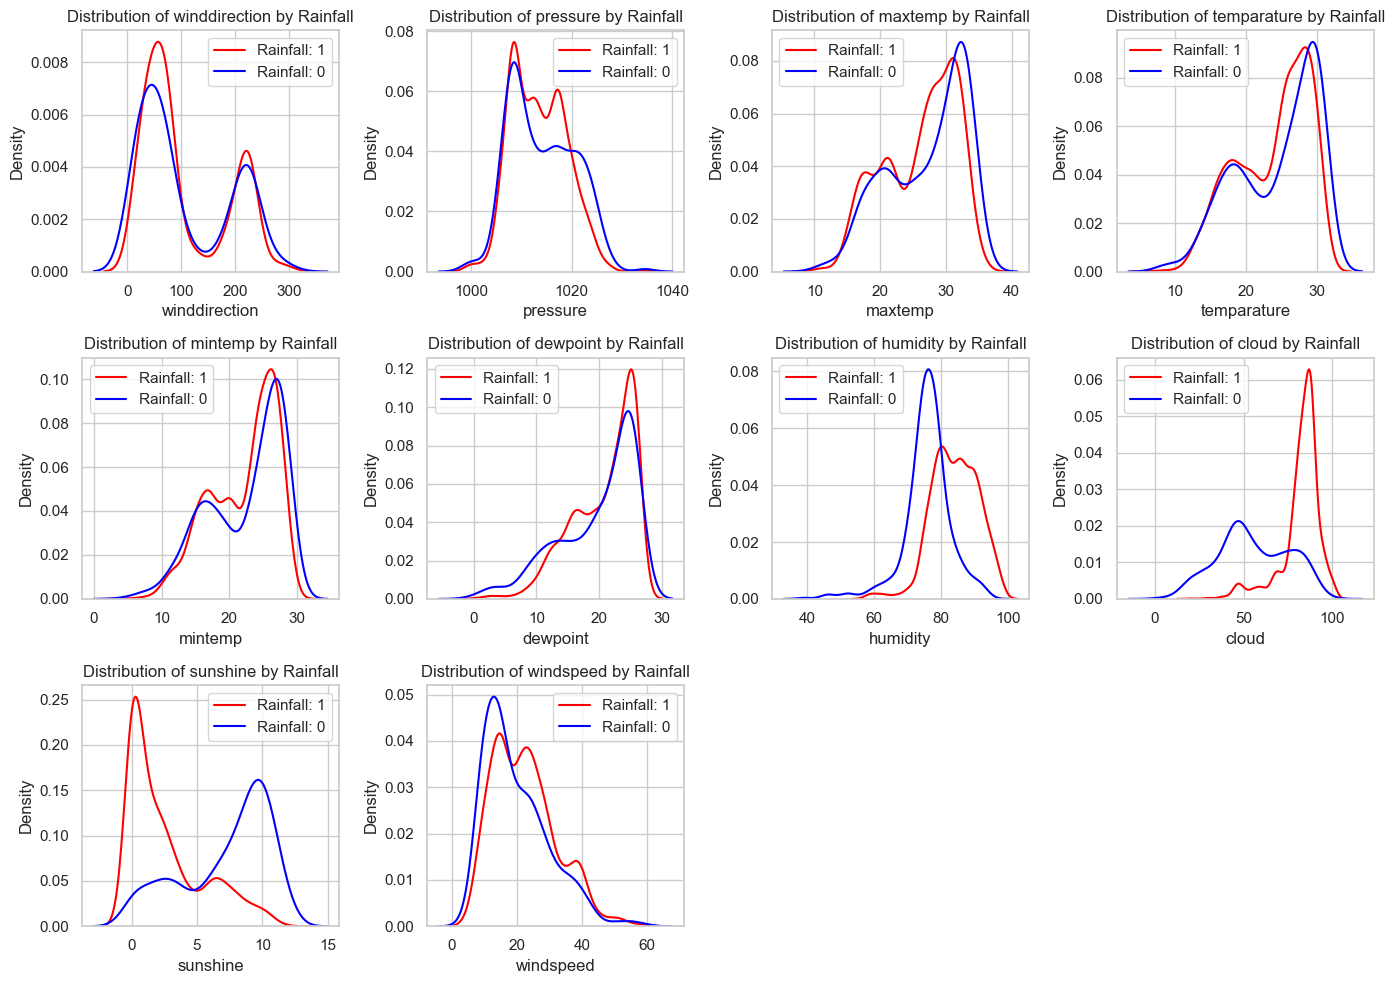

In [13]:
# KDE plot for Feature-Target Relationship
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(train[col][train['rainfall'] == 1], color='red', label='Rainfall: 1')
    sns.kdeplot(train[col][train['rainfall'] == 0], color='blue', label='Rainfall: 0')
    plt.title(f'Distribution of {col} by Rainfall')
    plt.legend()
plt.tight_layout()
plt.show()


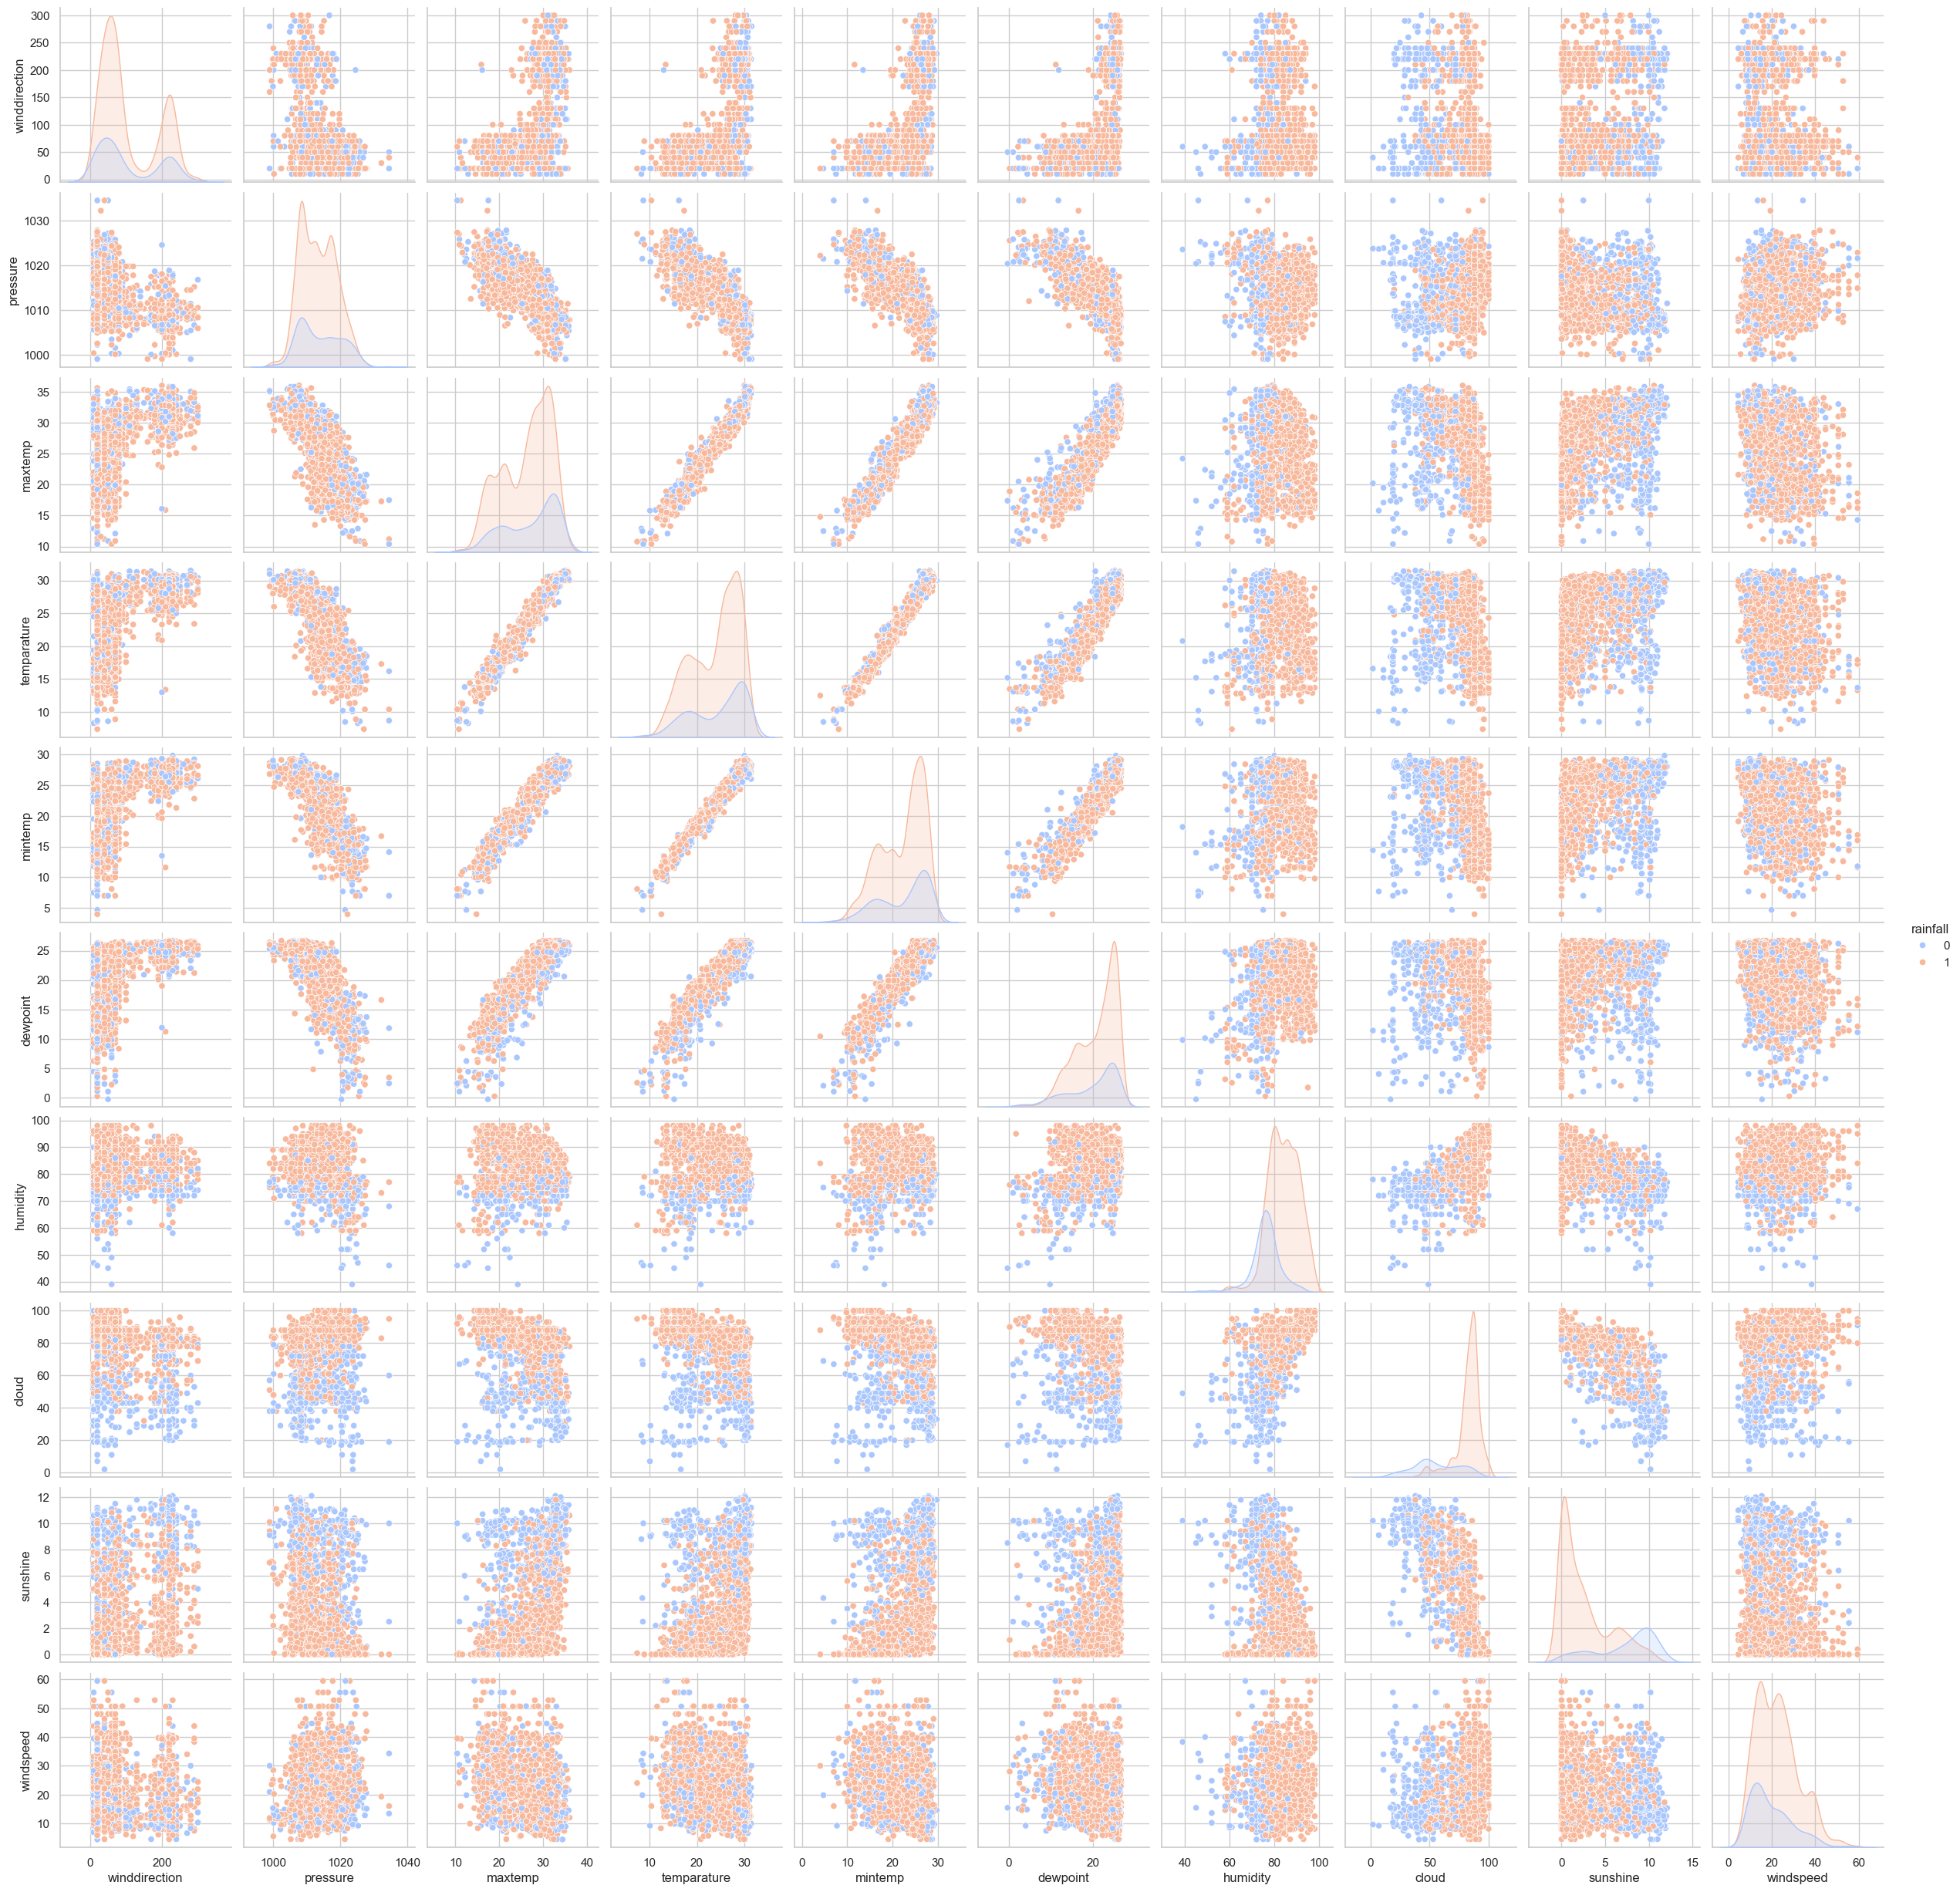

In [14]:
# Pairplot Analysis: Visualising relationships between variables
sns.pairplot(train[numerical_variables + ['rainfall']], hue='rainfall', palette='coolwarm', diag_kind='kde')
plt.show()

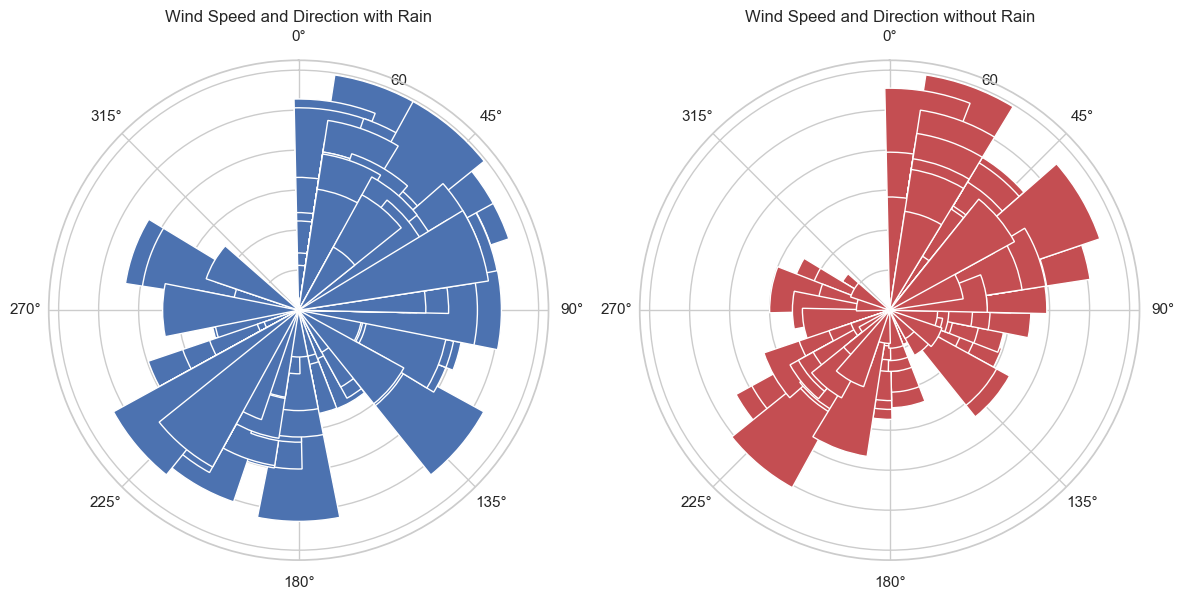

In [15]:
# Filter data based on rainfall
rain_data = train[train['rainfall'] > 0]
no_rain_data = train[train['rainfall'] == 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 6))

# First wind rose plot (rain)
ax1 = axes[0]
ax1.set_theta_direction(-1)
ax1.set_theta_offset(np.pi / 2.0)
bars1 = ax1.bar(
    np.deg2rad(rain_data['winddirection']),
    rain_data['windspeed'],
    width=np.pi/8,
    bottom=0.0,
    color="b"  
)
ax1.set_title('Wind Speed and Direction with Rain')

# Second wind rose plot (no rain)
ax2 = axes[1]
ax2.set_theta_direction(-1)
ax2.set_theta_offset(np.pi / 2.0)
bars2 = ax2.bar(
    np.deg2rad(no_rain_data['winddirection']),
    no_rain_data['windspeed'],
    width=np.pi/8,
    bottom=0.0,
    color="r"  
)
ax2.set_title('Wind Speed and Direction without Rain')

plt.tight_layout()
plt.show()

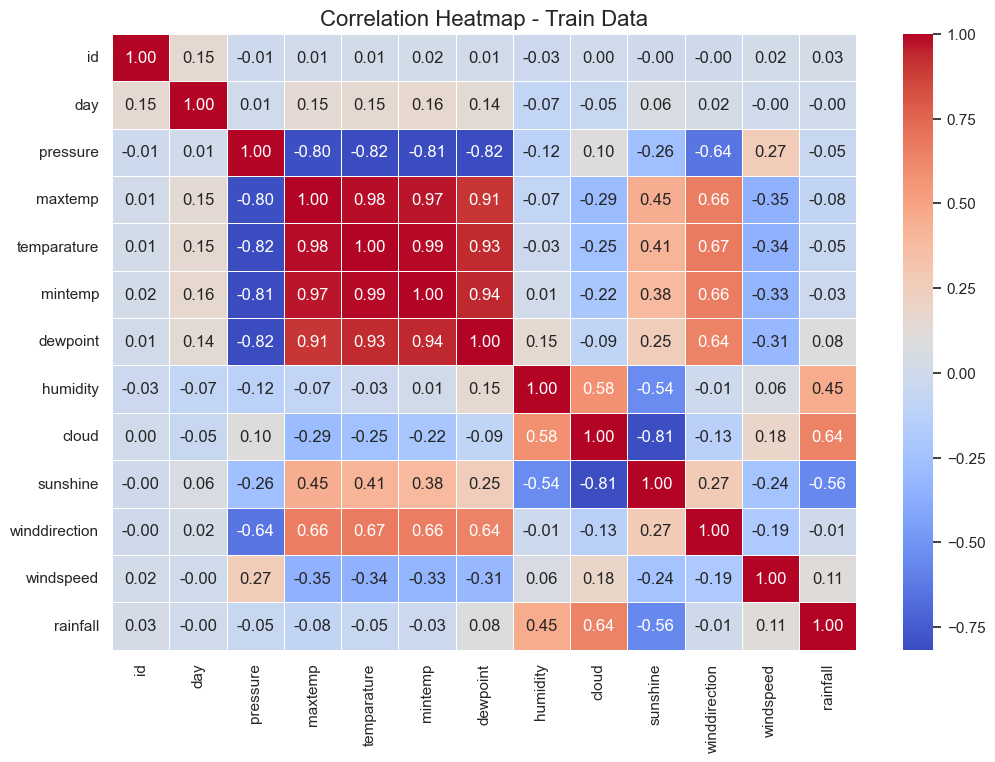

In [16]:
# Correlation heatmap
def plot_correlation_heatmap(data, title, annot_size=12):
    plt.figure(figsize=(12, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, annot_kws={"size": annot_size},cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap - {title}', fontsize=16)
    plt.show()

plot_correlation_heatmap(train, "Train Data")

In [17]:
def preprocess_weather_data(data):
    # Feature Engineering
    data["dew_humidity"] = data["dewpoint"] * data["humidity"] # ***
    data["cloud_windspeed"] = data["cloud"] * data["windspeed"] # ***
    data["cloud_to_humidity"] = data["cloud"] / data["humidity"]
    data["temp_to_sunshine"] = data["sunshine"] / data["temparature"]
    data['wind_temp_interaction'] = data['windspeed'] * data['temparature']
    data['cloud_sun_ratio'] = data['cloud'] / (data['sunshine'] + 1) # ***
    #data["cloud_sunshine_+"] = data["cloud"] + data["sunshine"]
    #data["cloud_sunshine_-"] = data["cloud"] - data["sunshine"]
    data["dew_humidity/sun"] = data["dewpoint"] * data["humidity"] / (data['sunshine'] + 1)
    data["dew_humidity_+"] = data["dewpoint"] * data["humidity"]
    

    data['humidity_sunshine_*'] = data["humidity"] * data['sunshine']

    data["cloud_humidity/pressure"] = (data["cloud"] * data["humidity"]) / data["pressure"]
    

    # Extract temporal features
    data['month'] = ((data['day'] - 1) // 30 + 1).clip(upper=12)
    data['season'] = data['month'].apply(lambda x: 1 if 3 <= x <= 5  # Spring
                                         else 2 if 6 <= x <= 8  # Summer
                                         else 3 if 9 <= x <= 11  # Autumn
                                         else 0)  # Winter
    # Seasonal trends
    #data['season_temp_trend'] = data['temparature'] * data['season']
    data['season_cloud_trend'] = data['cloud'] * data['season']
    

    # Seasonal deviation from mean values
    data['season_cloud_deviation'] = data['cloud'] - data.groupby('season')['cloud'].transform('mean')
    data['season_temperature'] = data['temparature'] * data['season']  # Interaction of temper



    
    data = data.drop(columns=["month"])
    #data['season_temp_trend'] = data['avg_temp'] * data['season']
    #data['season_dewpoint_trend'] = data['dewpoint'] * data['season']
    #data["dew_humidity_with_season"] = data['humidity'] * data['season']
    
    data = data.drop(columns=["maxtemp", "winddirection","humidity","temparature","pressure","day","season"])

    return data

# Apply to train and test datasets
train_data = preprocess_weather_data(train)
test_data = preprocess_weather_data(test)

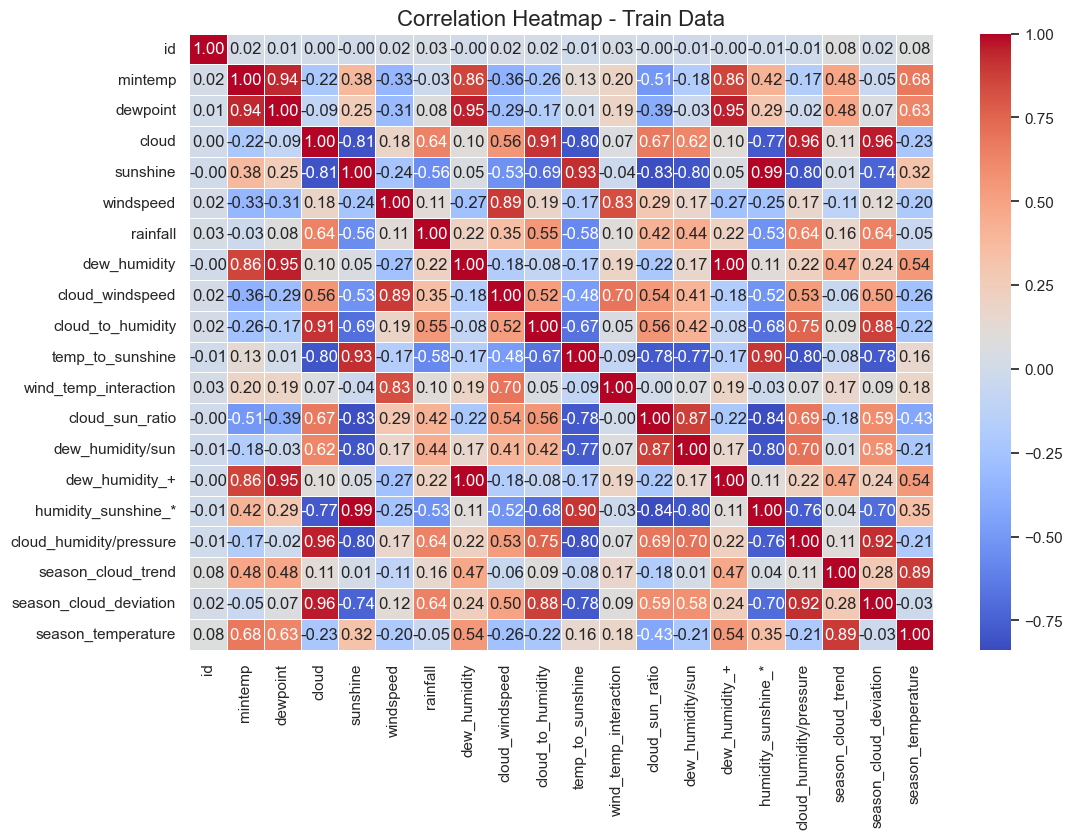

In [18]:
plot_correlation_heatmap(train_data, "Train Data")

In [19]:
# Select features and target variable
X = train_data.drop(['rainfall', 'id'], axis=1)
y = train_data['rainfall']
X_test = test_data.drop(['id'], axis=1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)